In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

In [2]:
#Set working directory
os.chdir("C:\\Users\\PUNEET SINGH\\PROJECTS")

In [3]:
#Load data
data = pd.read_csv("C:\\Users\\PUNEET SINGH\\abalone.csv")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.drop([0],axis=0,inplace=True)

In [5]:
data.dtypes   

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [6]:
data.describe()                 #summary of the data and can also see the outliers through count function

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [7]:
##########################################   missing  values ##############################################
#total_missing_values = df_day.isnull().sum().sort_values(ascending=False)
#total_missing_value

total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Rings,0,0.0
Shell weight,0,0.0
Viscera weight,0,0.0
Shucked weight,0,0.0
Whole weight,0,0.0
Height,0,0.0
Diameter,0,0.0
Length,0,0.0
Sex,0,0.0


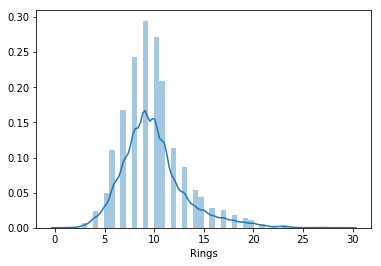

In [8]:

##################################################### Univariate Analysis##########################################
# Target variable  analysis

#descriptive statistics summary
data['Rings'].describe()

#Check whether target variable is normal or not
sns.distplot(data['Rings'])




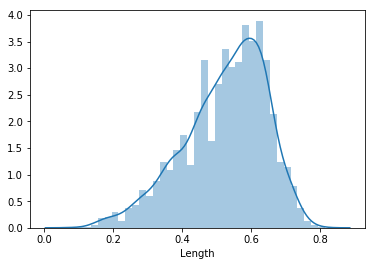

In [9]:
#Distribution  independent numeric variables 
#Check whether  variable 'length'is normal or not
sns.distplot(data['Length']);             #left skewed variable

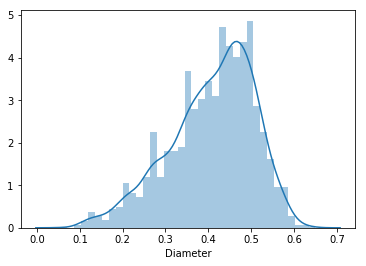

In [10]:
#Check whether  variable 'diameter'is normal or not
sns.distplot(data['Diameter']);                       #left skewed variable

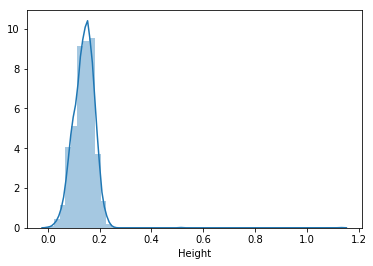

In [11]:
#Check whether  variable 'height'is normal or not
sns.distplot(data['Height']);

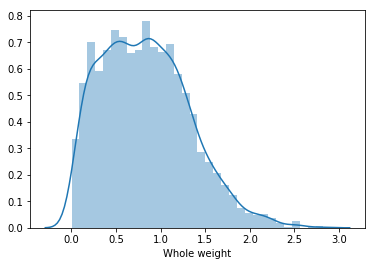

In [12]:
#Check whether  variable 'whole weight'is normal or not
sns.distplot(data['Whole weight']);

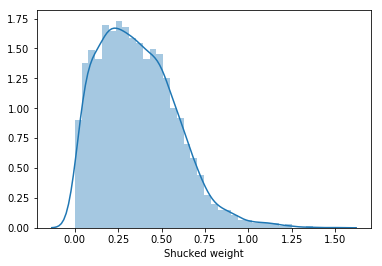

In [13]:
#Check whether  variable 'shucked weight'is normal or not
sns.distplot(data['Shucked weight']);

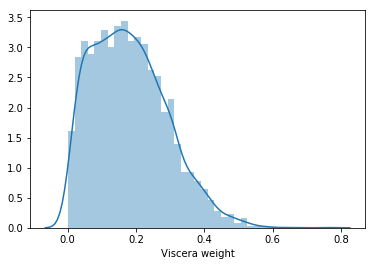

In [14]:
#Check whether  variable 'viscera weight'is normal or not
sns.distplot(data['Viscera weight']);

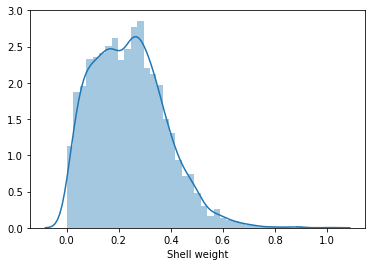

In [15]:
#Check whether  variable 'shell weight'is normal or not
sns.distplot(data['Shell weight']);

# CORRELATION ANALYSIS

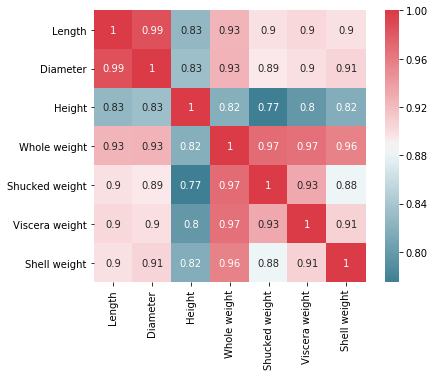

In [16]:
##Correlation analysis
#Correlation plot
cnames = [ "Length", "Diameter", "Height", "Whole weight", 
                "Shucked weight", "Viscera weight", "Shell weight"]
df_corr = data.loc[:,cnames]

#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot= True)
plt.show()

# SPLITTING THE DATASET

In [17]:
#Divide data into train and test
#importing the library
from sklearn.model_selection import train_test_split
x = data.iloc[:, 1:8].values
y = data.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3340, 7) (836, 7) (3340,) (836,)


In [18]:
y_train = y_train.reshape(-1,1)
y_train.shape

(3340, 1)

In [19]:
y_test = y_test.reshape(-1,1)
y_test.shape

(836, 1)

# MODELS

# Random forest

In [20]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(x_train, y_train)   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [21]:
# Use the forest's predict method on the test data
predictions = regressor.predict(x_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.19 degrees.


In [22]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
mape

array([[ 10.45454545,  25.        ,   9.90909091, ...,  24.63636364,
         54.81818182,  18.54545455],
       [ 40.71428571,  17.85714286,  41.57142857, ...,  95.85714286,
        143.28571429,  28.        ],
       [  9.44444444,   8.33333333,  10.11111111, ...,  52.33333333,
         89.22222222,   0.44444444],
       ...,
       [ 17.91666667,  31.25      ,  17.41666667, ...,  14.25      ,
         41.91666667,  25.33333333],
       [ 24.23076923,  36.53846154,  23.76923077, ...,   5.46153846,
         31.        ,  31.07692308],
       [ 23.125     ,   3.125     ,  23.875     , ...,  71.375     ,
        112.875     ,  12.        ]])

In [23]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 64.83 %.


In [24]:
#Divide data into train and test
train, test = train_test_split(data, test_size=0.2)

# Decision tree 

In [25]:
#Decision tree for regression
# Importing the library
from sklearn.tree import DecisionTreeRegressor

fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,1:8], train.iloc[:,8])

#Apply model on test data
predictions_DT = fit_DT.predict(test.iloc[:,1:8])


In [26]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(test.iloc[:,8], predictions_DT)

18.560485563022194

In [27]:
#MAPE: 19.02
#accuracy : 80.98

# Multiple linear regression

In [28]:
#Built Linear Regression
import statsmodels.api as sm

# Train the model using the training sets
model = sm.OLS(train.iloc[:,8], train.iloc[:,1:8]).fit()

In [29]:
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Rings   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     9666.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:59:14   Log-Likelihood:                -7461.3
No. Observations:                3340   AIC:                         1.494e+04
Df Residuals:                    3333   BIC:                         1.498e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Length             4.6545      1.914      2.432      0.015       0.902       8.407
Diameter          15.9292      2.546      6.257      0.000      10.938      20.921
Height            13.2300      1.636      8.085      0.000      10.022      16.438
Whole weight       8.8284      0.822     10.737      0.000       7.216      10.441
Shucked weight   -21.1107      0.924    -22.846      0.000     -22.922     -19.299
Viscera weight   -11.9204      1.467     -8.125      0.000     -14.797      -9.044
Shell weight       6.4202      1.264      5.077      0.000       3.941       8.899
==============================================================================
Omnibus:                      651.074   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1687.961
Skew:                           1.051   Prob(JB):                         0.00
Kurtosis:                       5.776   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# make the predictions by the model
predictions_LR = model.predict(x_test) 

In [31]:
#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#Calculate MAPE
MAPE(test.iloc[:,8], predictions_LR)

34.39314261705993

In [32]:
#MAPE = 17.10
#ACCURACY = 82.90

In [33]:
###CONCLUSION : BEST SUITED MODEL IS RANDOM FOREST WITH AN ACCURACY OF 84.18%.